# Diabetes Health Indicators Dataset Analysis and Predictions

### Context
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from summarytools import dfSummary

In [2]:
#Importing Dataset
Data = pd.read_csv(r"C:\Users\Deepak Chaudhary\Downloads\diabetes1.csv")
pd.set_option('display.max_columns', None)

Data.sample(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
45537,2.0,1.0,0.0,1.0,32.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,9.0,6.0,3.0
205714,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,6.0,6.0,8.0
174569,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,5.0,0.0,1.0,9.0,6.0,8.0
107802,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,5.0,15.0,30.0,0.0,1.0,8.0,5.0,3.0
65785,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,20.0,15.0,0.0,1.0,5.0,4.0,5.0


### About Dataset
diabetes1.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables

* Diabetes_o12: 0 = no diabetes, 1 = prediabetes, 2 = diabetes
* HighBP: 0 = no high BP, 1 = high BP
* HighChol: 0 = no high cholesterol, 1 = high cholesterol
* CholCheck: 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
* BMI: Body Mass Index
* Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
* Stroke: (Ever told) you had a stroke. 0 = no 1 = yes
* HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
* PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
* Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes
* Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
* HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
* AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
* NoDocbccost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
* GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
* MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
* PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
* DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
* Sex: 0 = female 1 = male
* Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
* Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
* Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

In [3]:
dfSummary(Data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Diabetes_012[float64],1. 0.02. 2.03. 1.0,"213,703 (84.2%)35,346 (13.9%)4,631 (1.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABnElEQVR4nO3dMW7aABiG4d8RiprFFkLKYXyIHraH8G0QwkOJsrhD0yqJuv4fsfo8G4vt4QVkxAfDtm0FCQ/3vgD+H0NVPVXV470vhC/hddu2W9fBD6fT6fs4jseuE7Af67pehmH40RXcYRzH4zzPt2maXjpOwD5cr9dvy7Icz+fzY1X1xFZVNU3Ty/Pz88+OE7ArT50Hd4NAjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhD1e/vMt37QrivRAOHdV0vy7Icq/m7THx967pequq16/g2CLzXukEYTPlI6Xxla32WsD9t66rupQ7707KuSix12J/OdZW7Wz7woS4xYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YlrWVdZa/Evbuqp7qcP+2CAQY11FjBsEYj6/jXrro82HKZ/5HZ0e/kz55nm+vUXnpxho8XfK9/bY/I42bhCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEeOP0oh5P+Uzv6OVDQIxpnzE/AJXopbrppKjEAAAAABJRU5ErkJggg=="">",0(0.0%)
2,HighBP[float64],1. 0.02. 1.0,"144,851 (57.1%)108,829 (42.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABM0lEQVR4nO3bQWrDMBhE4VExodlIGIMP40P0sD2EbmOMtWhCNuqiAZ9Ao2K/7wR/wsOQ4Am1VgEOQdJd0q33ISf3qrU+eh/R2zBN01eMcex9yJmVUrYQwvfVgxtijOOyLI+U0rP3MWe07/tnznlc1/Um6dqxSVJK6TnP80/vY07s3vuA/+Cj9wG4DmKDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2wG6e8Fv96HnBXf7WEopWw551G84NdMKWWT9Op9R28MXjwYvEgKTPngwpPtwNOnMaZ8b8zt2mPKJ+Z2Lkz5Dvwab4w/dWFDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDVM+8fldmPK9Mbdrj8HLgcFLY78KW2rfLYfn7QAAAABJRU5ErkJggg=="">",0(0.0%)
3,HighChol[float64],1. 0.02. 1.0,"146,089 (57.6%)107,591 (42.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABM0lEQVR4nO3bQWrDMBhE4VExodlIGIMP40P0sD2EbmOMtWhCNuqiAZ9Ao2K/7wR/wsOQ4Am1VgEOQdJd0q33ISf3qrU+eh/R2zBN01eMcex9yJmVUrYQwvfVgxtijOOyLI+U0rP3MWe07/tnznlc1/Um6dqxSVJK6TnP80/vY07s3vuA/+Cj9wG4DmKDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2wG6e8Fv96HnBXf7WEopWw551G84NdMKWWT9Op9R28MXjwYvEgKTPngwpPtwNOnMaZ8b8zt2mPKJ+Z2Lkz5Dvwab4w/dWFDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDVM+8fldmPK9Mbdrj8HLgcFLY78KW2rfLYfn7QAAAABJRU5ErkJggg=="">",0(0.0%)
4,CholCheck[float64],1. 1.02. 0.0,"244,210 (96.3%)9,470 (3.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bMWrDMBiG4V/FhGaRMAYfxofoYXsI3cYYa2hCFnXoVGMZYppPoL7P6OkfXgwJ/lzO2QAFZ2ZXM7vUPgRNeeScb9uH3TAMH977vsZFaFNKaXHOfW6D67z3/TRNtxDCvdZxaMe6ru8xxn6e54uZ/Y7NzCyEcB/H8avKdWjRde/hm/oK/F/EBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIdGY/H7zVPgRtOGqpSyktMcbeCh+8Ac9KKS1m9tg+Z/CCV9gdvDimfFA5erPt1gmcVZzyleZYwFm7U76jORZw1tGUj1+n+FP8qQsZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZHanfEz78ArFKV9pjgWcxeAFMt8KW2rfzqzdbgAAAABJRU5ErkJggg=="">",0(0.0%)
5,BMI[float64],Mean (sd) : 28.4 (6.6)min < med < max:12.0 < 27.0 < 98.0IQR (CV) : 7.0 (4.3),84 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACVklEQVR4nO3dMY7aQBiG4X/CggwoY1mWoOMCkVJQ+hB72LTpUnACbkCDkBAY4cXBGKdKmSy2IfHHvk8/sxa88mKkn3FVVRnQdZ/+9wUAt3h55ObOuaGZDVpsca6q6nSv64Guh4XqnBvGcfzqvY+a7nE4HHbOuW/EikfeUQfe+yhJklMYhnndxWmaBovFItputwMzI9QP7qH/+s3MwjDMJ5PJW8Plw7teDGTxMAUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJD//F6TbKsuybmXfONVnOQRVPpLOhZlnWL4ri62w26/V6vdpnAHBQxXPpbKjn8/klCILRfD7Pp9Pprs5aDqp4Pp0N9bfxeNz0sAoOqngiPExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCQudnpppqOWptxrh1p7wbq

### Data Preprocessing

In [4]:
# Checking for Duplicacy
Data[Data.duplicated()]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


We will drop the duplicate rows because duplicate rows can lead to skewed analysis results and inaccurate insights. Removing duplicates ensures that your analysis is based on accurate and reliable data

In [5]:
# Droping duplicates
Data.drop_duplicates()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
# Checking for null values
Data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### With this dataset, we might have a better insight on following questions
* Does higher education or income level correlate with better health?
* Is there a significant association between smoking (Smoker) and the likelihood of having prediabetes or diabetes?
* Is heavy alcohol consumption (HvyAlcoholConsump) associated with a higher risk of stroke and heart disease?
* Are individuals who reported cost-related barriers to seeing a doctor (NoDocbccost) more likely to have poor health perception (GenHlth)
* How does gender (Sex) affect the prevalence of diabetes, high blood pressure, and heart disease?
* How does physical activity (PhysActivity) relate to the occurrence of diabetes, high blood pressure, and heart disease?
* Do individuals who consume fruits and vegetables more frequently have lower rates of high blood pressure and high cholesterol?

In [7]:
# Select relevant columns
columns_of_interest = ['Education', 'Income', 'GenHlth']
df = Data[columns_of_interest].copy()

In [8]:
# Correlation Analysis
correlation_matrix = df.corr()
print(correlation_matrix)

           Education    Income   GenHlth
Education   1.000000  0.449106 -0.284912
Income      0.449106  1.000000 -0.370014
GenHlth    -0.284912 -0.370014  1.000000


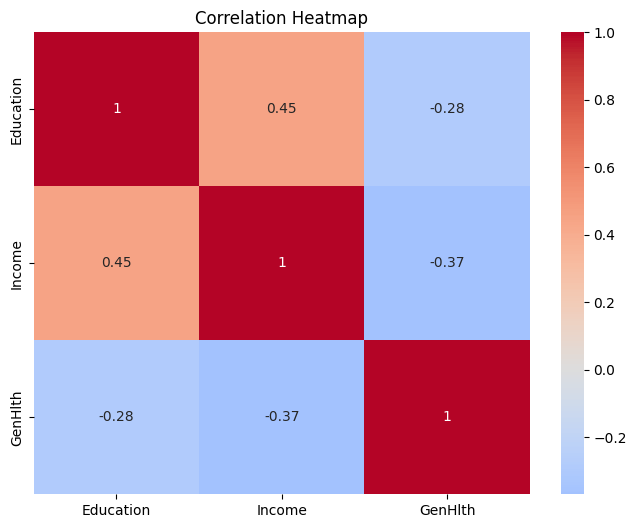

In [9]:
# Correlation Visualtisation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

* The correlation between GenHlth (general health perception) and Education is approximately -0.28. This negative correlation suggests that as the level of education increases, the general health perception tends to be slightly lower.
* The correlation between GenHlth and Income is approximately -0.37. This negative correlation indicates that as income increases, the general health perception tends to be slightly lower.  
Note: These correlation coefficients indicate an association between variables but do not provide information about the direction of causality. Other factors may be influencing these relationships. For example, it's possible that socioeconomic factors or access to healthcare may contribute to these correlations.

In [10]:
# Select relevant columns
columns_of_interest = ['Smoker', 'Diabetes_012']
df = Data[columns_of_interest].copy()

In [11]:
# Seggregating the Data
grouped_data = df.groupby(['Smoker', 'Diabetes_012']).size().unstack()

<Figure size 800x600 with 0 Axes>

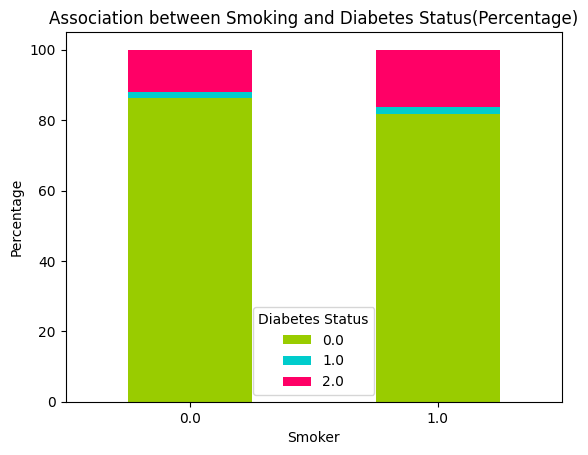

In [12]:
# Calculate the proportions (percentages) within each group
percentage_data = grouped_data.div(grouped_data.sum(1), axis=0) * 100
sns.set_palette(['#99cc00', '#00cccc','#ff0066'])
# Plot the percentage bar graph
plt.figure(figsize=(8, 6))
percentage_data.plot(kind='bar', stacked=True)
plt.title('Association between Smoking and Diabetes Status(Percentage)')
plt.xlabel('Smoker')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Diabetes Status')
plt.show()

Diabetes Distribution:

    Among non-smokers (Smoker = 0.0), the counts are as follows:
        No diabetes (Diabetes_012 = 0.0): 121,879
        Prediabetes (Diabetes_012 = 1.0): 2,349
        Diabetes (Diabetes_012 = 2.0): 17,029
    Among smokers (Smoker = 1.0), the counts are as follows:
        No diabetes (Diabetes_012 = 0.0): 91,824
        Prediabetes (Diabetes_012 = 1.0): 2,282
        Diabetes (Diabetes_012 = 2.0): 18,317
* The counts indicate that both non-smokers and smokers have a higher number of individuals with no diabetes (Diabetes_012 = 0.0) compared to prediabetes (Diabetes_012 = 1.0) and diabetes (Diabetes_012 = 2.0).
* Smokers have higher counts in the prediabetes and diabetes categories compared to non-smokers, suggesting a potential association between smoking and an increased likelihood of prediabetes and diabetes.

In [13]:
# Select relevant columns
columns_of_interest = ['HvyAlcoholConsump', 'HeartDiseaseorAttack']
df = Data[columns_of_interest].copy()

In [14]:
# Group the data by 'HvyAlcoholConsump' and'HeartDiseaseorAttack' and calculate the counts
grouped_data1 = df.groupby(['HvyAlcoholConsump', 'HeartDiseaseorAttack']).size().unstack()
grouped_data1

HeartDiseaseorAttack,0.0,1.0
HvyAlcoholConsump,,
0.0,216379,23045
1.0,13408,848


<Figure size 800x600 with 0 Axes>

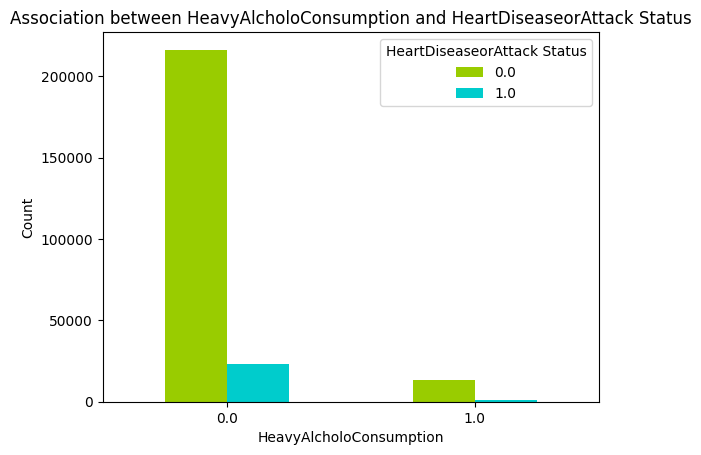

In [15]:
# Plot the grouped bar plot with Magma color palette
plt.figure(figsize=(8, 6))
sns.set_palette(['#99cc00', '#00cccc'])
grouped_data1.plot(kind='bar', stacked=False)
plt.title('Association between HeavyAlcholoConsumption and HeartDiseaseorAttack Status')
plt.xlabel('HeavyAlcholoConsumption')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='HeartDiseaseorAttack Status')
plt.show()

* The data indicates that individuals who do not have heavy alcohol consumption have a higher number of individuals without heart disease (HeartDiseaseorAttack = 0.0) compared to those with heart disease (HeartDiseaseorAttack = 1.0).
* Individuals with heavy alcohol consumption also have a higher count of no heart disease compared to heart disease, but the counts in both categories are much lower than those for individuals without heavy alcohol consumption.

In [16]:
# Select relevant columns
columns_of_interest = ['HvyAlcoholConsump', 'Stroke']
df = Data[columns_of_interest].copy()

In [17]:
# Group the data by 'HvyAlcoholConsump' and'HeartDiseaseorAttack' and calculate the counts
grouped_data2 = df.groupby(['HvyAlcoholConsump', 'Stroke']).size().unstack()
grouped_data2

Stroke,0.0,1.0
HvyAlcoholConsump,,
0.0,229515,9909
1.0,13873,383


<Figure size 800x600 with 0 Axes>

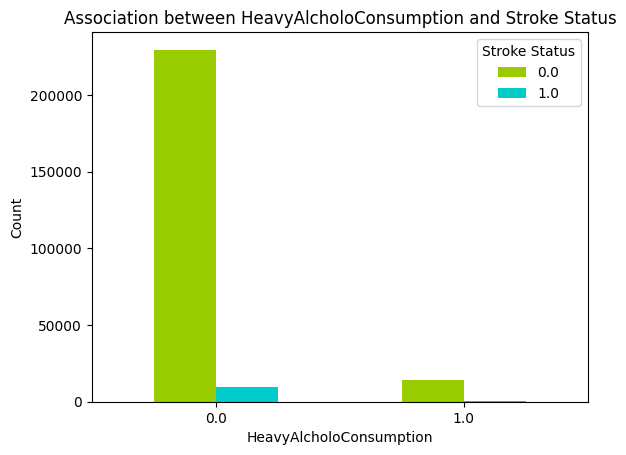

In [18]:
# Plot the grouped bar plot with Magma color palette
plt.figure(figsize=(8, 6))
sns.set_palette(['#99cc00', '#00cccc'])  # Set the color palette to 'magma'
grouped_data2.plot(kind='bar', stacked=False)
plt.title('Association between HeavyAlcholoConsumption and Stroke Status')
plt.xlabel('HeavyAlcholoConsumption')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Stroke Status')
plt.show()

* The data suggests that individuals who do not have heavy alcohol consumption (HvyAlcoholConsump = 0.0) have a much higher count of no stroke (Stroke = 0.0) compared to those who had a stroke (Stroke = 1.0).
* Similarly, individuals with heavy alcohol consumption (HvyAlcoholConsump = 1.0) also have a higher count of no stroke compared to having a stroke, but the counts in both categories are lower than those for individuals without heavy alcohol consumption.

In [19]:
# Calculate proportions
cost_barrier = len(Data.loc[Data[Data['NoDocbcCost']==1].index.values,'GenHlth'].index.values.tolist())
no_cost_barrier = len(Data.loc[Data[Data['NoDocbcCost']==0].index.values,'GenHlth'].index.values.tolist())

print("Proportion with poor health perception (Cost Barrier):", cost_barrier)
print("Proportion with poor health perception (No Cost Barrier):", no_cost_barrier)


Proportion with poor health perception (Cost Barrier): 21354
Proportion with poor health perception (No Cost Barrier): 232326


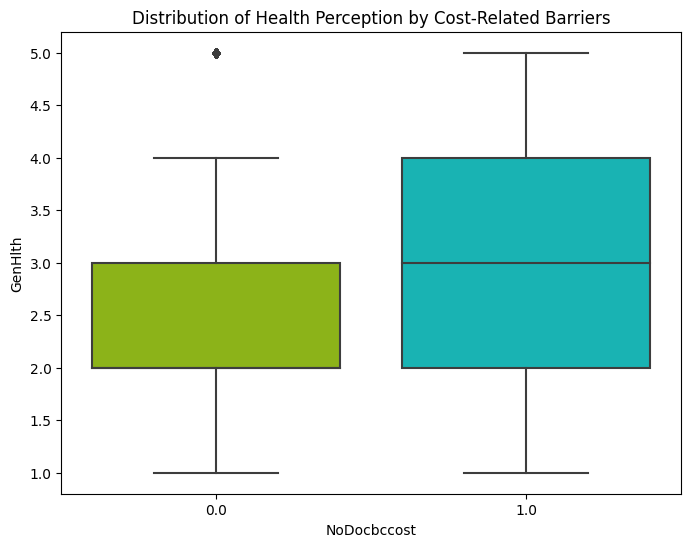

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='NoDocbcCost', y='GenHlth', data=Data,palette=['#99cc00', '#00cccc'])
plt.title('Distribution of Health Perception by Cost-Related Barriers')
plt.xlabel('NoDocbccost')
plt.ylabel('GenHlth')
plt.show()

The box plot clearly illustrates a distinct difference in health perception between individuals who reported no cost-related barriers (NoDocbccost = 0) and those who faced cost-related barriers (NoDocbccost = 1). The distribution of health perception scores (GenHlth) is notably lower among individuals with no cost-related barriers, indicating a relatively poorer health perception compared to those who have cost barriers.

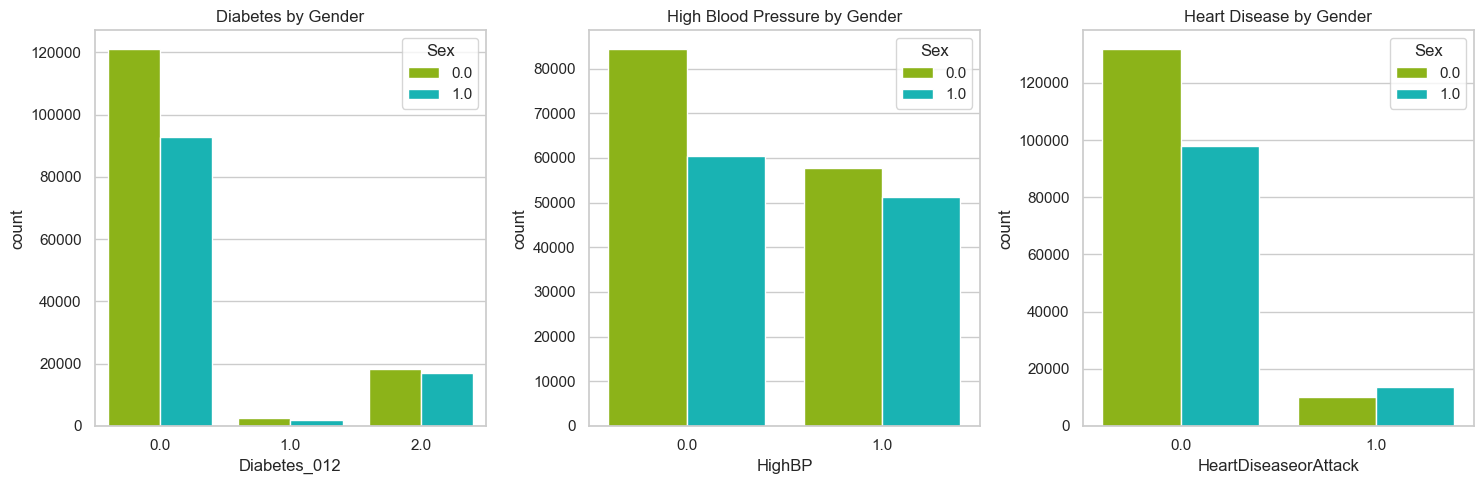

In [21]:
# Set style
sns.set(style="whitegrid")

# Create subplots for each condition
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Diabetes
sns.countplot(data=Data, x='Diabetes_012', hue='Sex', palette=['#99cc00', '#00cccc'], ax=axes[0])
axes[0].set_title('Diabetes by Gender')

# Plot for High Blood Pressure
sns.countplot(data=Data, x='HighBP', hue='Sex', palette=['#99cc00', '#00cccc'], ax=axes[1])
axes[1].set_title('High Blood Pressure by Gender')

# Plot for Heart Disease
sns.countplot(data=Data, x='HeartDiseaseorAttack', hue='Sex', palette=['#99cc00', '#00cccc'], ax=axes[2])
axes[2].set_title('Heart Disease by Gender')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

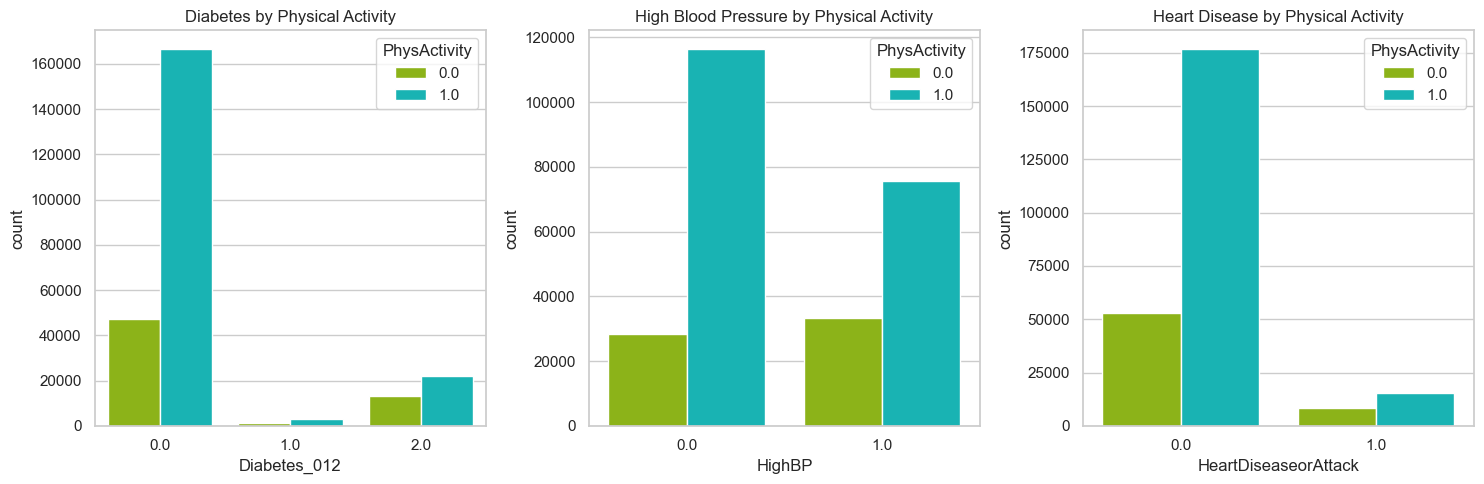

In [22]:
# Set style
sns.set(style="whitegrid")

# Create subplots for each condition
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Diabetes
sns.countplot(data=Data, x='Diabetes_012', hue='PhysActivity', palette=['#99cc00', '#00cccc'], ax=axes[0])
axes[0].set_title('Diabetes by Physical Activity')

# Plot for High Blood Pressure
sns.countplot(data=Data, x='HighBP', hue='PhysActivity', palette=['#99cc00', '#00cccc'], ax=axes[1])
axes[1].set_title('High Blood Pressure by Physical Activity')

# Plot for Heart Disease
sns.countplot(data=Data, x='HeartDiseaseorAttack', hue='PhysActivity', palette=['#99cc00', '#00cccc'], ax=axes[2])
axes[2].set_title('Heart Disease by Physical Activity')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

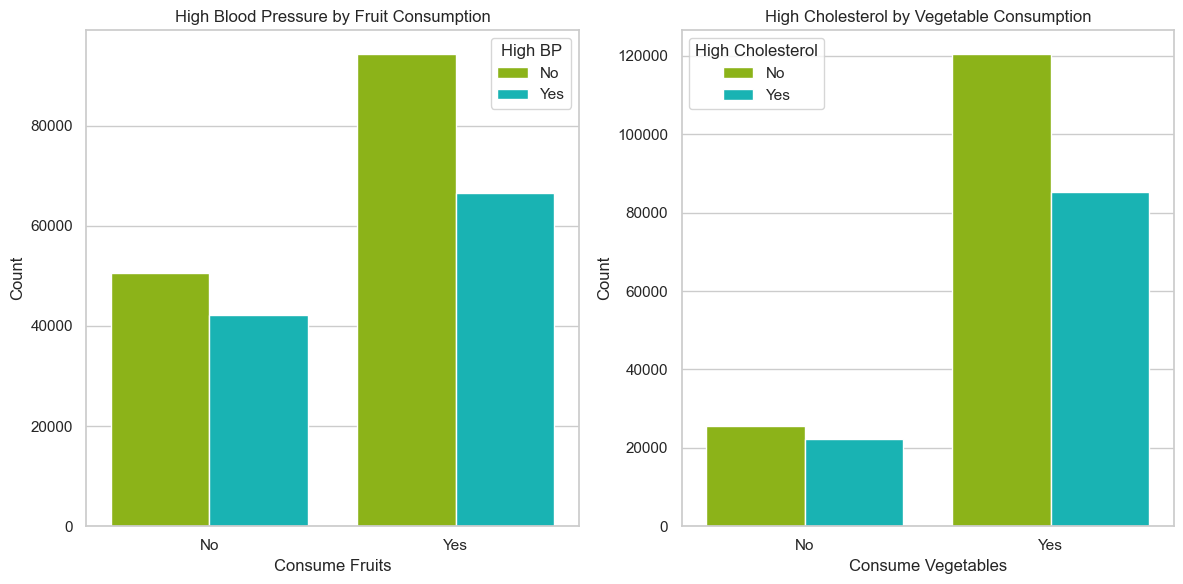

In [23]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for High Blood Pressure
sns.countplot(data=Data, x='Fruits', hue='HighBP', palette=['#99cc00', '#00cccc'], ax=axes[0])
axes[0].set_title('High Blood Pressure by Fruit Consumption')
axes[0].set_xlabel('Consume Fruits')
axes[0].set_ylabel('Count')
axes[0].legend(title='High BP', labels=['No', 'Yes'])
axes[0].set_xticklabels(['No', 'Yes'])

# Plot for High Cholesterol
sns.countplot(data=Data, x='Veggies', hue='HighChol', palette=['#99cc00', '#00cccc'], ax=axes[1])
axes[1].set_title('High Cholesterol by Vegetable Consumption')
axes[1].set_xlabel('Consume Vegetables')
axes[1].set_ylabel('Count')
axes[1].legend(title='High Cholesterol', labels=['No', 'Yes'])
axes[1].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [24]:
# Checking the Correlation between columns
Data.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


<Axes: >

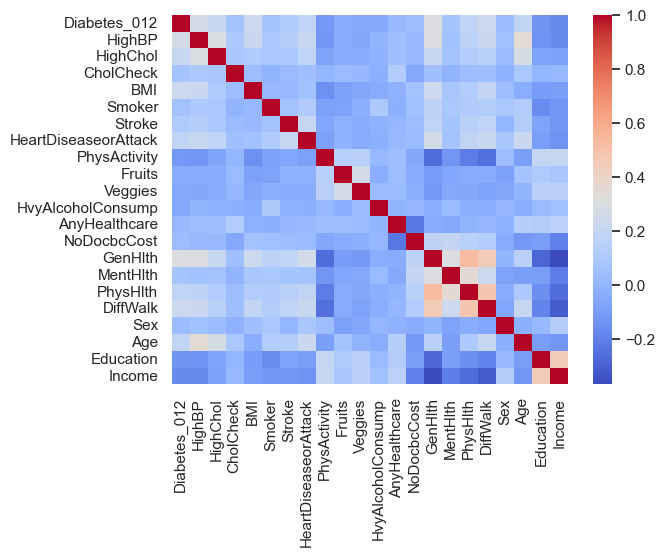

In [25]:
# Plotting the HeatMap
sns.heatmap(Data.corr(),cmap = 'coolwarm')

### Utilizing Machine Learning Models for Training and Prediction Tasks

In [26]:
# Taking our Target varible(Outcome) in Y variable
Y = Data.Diabetes_012.to_numpy()
Y

array([0., 0., 0., ..., 0., 0., 2.])

In [27]:
# Now removing the Outcome column from the dataset
Data.drop(['Diabetes_012'],axis = 1,inplace = True)
Data.sample(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
124619,0.0,1.0,1.0,44.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,10.0,25.0,1.0,0.0,9.0,5.0,2.0
48884,0.0,0.0,1.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,4.0,6.0
174772,1.0,1.0,1.0,43.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,1.0,11.0,4.0,2.0
77017,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
217234,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,5.0,0.0,0.0,0.0,10.0,4.0,8.0


In [28]:
# Dataset
X = Data.to_numpy()
X

array([[1., 1., 1., ..., 9., 4., 3.],
       [0., 0., 0., ..., 7., 6., 1.],
       [1., 1., 1., ..., 9., 4., 8.],
       ...,
       [0., 0., 1., ..., 2., 5., 2.],
       [1., 0., 1., ..., 7., 5., 1.],
       [1., 1., 1., ..., 9., 6., 2.]])

* X: It represents the feature matrix, which contains the input variables or features used to make predictions.
* Y: It represents the target vector, which contains the corresponding labels or values that the model aims to predict.

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (177576, 21)
x_test shape:  (76104, 21)
y_train shape:  (177576,)
y_test shape:  (76104,)


* x_train: The training set containing 70% of the features used to train the model.
* x_test: The testing set containing 30% of the features used to evaluate the model's performance.
* y_train: The corresponding target values for the training set.
* y_test: The corresponding target values for the testing set.

### Utilizing the Decision Tree Classifier for Classification

In [30]:
dtc = DecisionTreeClassifier(random_state = 0)

# Training our machine
dtc.fit(x_train,y_train)

# Making predictions
dtc_predict = dtc.predict(x_test)

# Calculating Accuracy
dtc_acc = accuracy_score(dtc.predict(x_test),y_test)

print(f"Accuracy: {dtc_acc}")

Accuracy: 0.7680279617365711


An accuracy of 0.76 (76%) in a decision tree classifier applied to predict the Diabetes_012 target variable means that the model correctly predicted the diabetes status for approximately 76% of the samples in your dataset.

Note: Decision trees can easily become overfit to the training data if they are too deep and complex. This can lead to a model that performs well on the training data but poorly on new, unseen data (i.e., testing data). Overfitting can impact the model's generalization ability and lower its accuracy on new data.

### Utilizing the GaussianNB Model for Classification

In [31]:
gnb = GaussianNB()

# Training our machine
gnb.fit(x_train,y_train)

# Making predictions
gnb_predict = gnb.predict(x_test)

# Calculating Accuracy
gnb_acc = accuracy_score(gnb_predict,y_test)

print(f"Accuracy: {gnb_acc}")

Accuracy: 0.7624303584568485


An accuracy of 76.28% when using Gaussian Naive Bayes (GaussianNB) to predict the Diabetes_012 target variable indicates that the model correctly predicted the diabetes status for approximately 76.28% of the samples in your dataset. 

Given an accuracy of 76.28% for GaussianNB, it indicates that the algorithm has learned patterns in your data that allow it to predict diabetes status with reasonable success.
The accuracy of the decision tree classifier was 76.80%, indicating that both algorithms are performing at similar levels in this specific case.

### Utilizing the Logistic Regression for Classification

In [34]:
lgr = LogisticRegression(max_iter=100000)

# Training our machine
lgr.fit(x_train, y_train)

# Making predictions
lgr_predict = lgr.predict(x_test)

# Calculating Accuracy
lgr_acc = accuracy_score(lgr_predict, y_test)

print(f"Accuracy: {lgr_acc}")

Accuracy: 0.8463681278250814


An accuracy of 84.6% when using Logistic Regression to predict the Diabetes_o12 target variable indicates that the model correctly predicted the diabetes status for approximately 84.6% of the samples in your dataset.

## Conclusion

Here's a brief overview of their accuracies and the potential reasons behind their performances:
---
___
***

***Gaussian Naive Bayes (GaussianNB):***  
**Accuracy:** 76.28%  
Reasons:
* GaussianNB makes the assumption of feature independence given the class, which may not hold in all cases.
* It assumes Gaussian distribution of features within each class, which might not perfectly match the data.
* The model is relatively simple and may not capture complex interactions among features.
* It can handle small datasets and might perform better when classes are balanced.

***Decision Tree Classifier:***  
**Accuracy:** 76%  
Reasons:  
* Decision trees capture complex feature interactions, but they are prone to overfitting if not pruned properly.
* They can handle both linear and non-linear relationships.
* The accuracy might be influenced by the depth of the tree, feature selection, and data preprocessing.
* Decision trees can work well for datasets with imbalanced classes.

***Logistic Regression:***  
**Accuracy:** 84.6%  
Reasons:
* Logistic Regression assumes a linear relationship between features and the log-odds of the target class.
* It can capture linear relationships effectively and can benefit from proper feature scaling.
* Regularization techniques can prevent overfitting and improve generalization to new data.
* The model provides coefficient values for feature interpretation.
* Logistic Regression might perform well when the relationship between features and the target is approximately linear.

***Key Takeaways:***  
* The performances of these models are relatively close, with Logistic Regression achieving the highest accuracy followed by GaussianNB and then the Decision Tree.
* GaussianNB might have limitations due to its assumptions of feature independence and Gaussian distribution.
* Decision trees can capture complex relationships but might overfit if not controlled.
* Logistic Regression can perform well when there's a linear relationship between features and the target.